$$G=\sum^{K}_{k=1}p(k)(1-p(k))$$

### Q1) https://scikit-learn.org/stable/modules/tree.html#tree 샘플 확인 하자.  

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

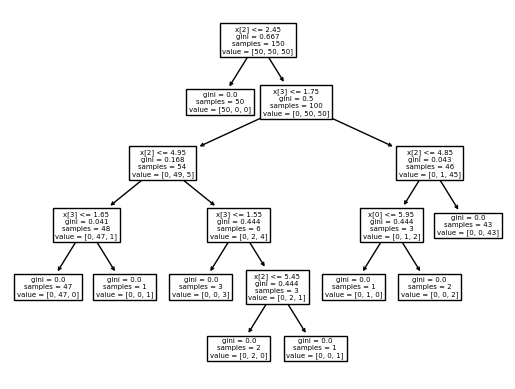

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y) 
tree.plot_tree(clf) # 그림에 있는 내용 텍스트를 출력한 것

In [2]:
import graphviz # tree 대상을 파일로 저장, View 결정
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

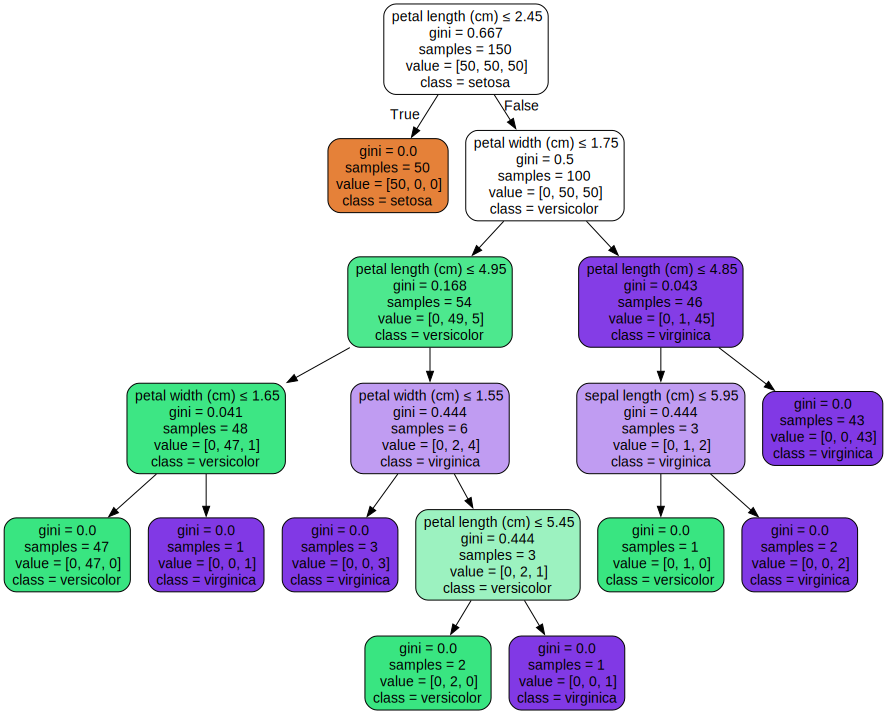

In [3]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#### Q2) sklearn.ensemble.VotingClassifier를 사용하자.

In [4]:
#1.데이터를 로드하자 . 단, 2개의 클래스만 추출  -> 클래스라벨을 수치화 -> 분리 -> 표준화   
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

iris  = load_iris() 
X,y  = iris.data[50:,[1,2]] , iris.target[50:]

le= LabelEncoder() 

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.5, random_state =123)

sc  =  StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [5]:
#2.앙상블 할 모델을 생성하자.  결합
from sklearn.linear_model import LogisticRegression #lr
from sklearn.ensemble import RandomForestClassifier #rf 
from sklearn.neighbors import KNeighborsClassifier  #knn

est1 = LogisticRegression(penalty ='l2' , C=0.01, random_state = 1 )
est2 = RandomForestClassifier(n_estimators=10 , random_state = 1)
est3 = KNeighborsClassifier(n_neighbors =1) 


In [6]:
#3. 각 앙상블에 사용할 수 있는 분류기들을 실행하면서 모델을 확인하자.  
#  예측 정밀도에 영향을 주는 변수  : estimators , voting, weights 3가지 이다.  -> 테스트 데이터의 정답률
#  score(X,y)  y를 정답 레이블로 , X로 부터 예측되는 값의  정답률
from sklearn.ensemble import VotingClassifier

vc1 =VotingClassifier(estimators=[('lr',est1), ('rf', est2),('knn' , est3) ] , voting='hard')  

vc2 =VotingClassifier(estimators=[('lr',est1), ('rf', est2),('knn' , est3) ] , voting='soft', \
                      flatten_transform=True )  

vc3 =VotingClassifier(estimators=[('lr',est1), ('rf', est2),('knn' , est3) ] , voting='soft', \
                                            flatten_transform=True,  weights=[10,1,1])

In [7]:
#4. 실행, 출력하자. 
name_list = ['Logistic' ,'RandomForest', 'KNeighbors' , 'voting=hard' , 'voting=soft' ,'voting,weights'  ]
est_list =[est1,est2, est3, vc1,vc2,vc3]

for est, name in zip( est_list , name_list) :
    est.fit(X_train_std, y_train)
    print('ACC. : %.2f [%s]' % (est.score(X_test_std, y_test), name))
    

ACC. : 0.68 [Logistic]
ACC. : 0.92 [RandomForest]
ACC. : 0.86 [KNeighbors]
ACC. : 0.86 [voting=hard]
ACC. : 0.86 [voting=soft]
ACC. : 0.86 [voting,weights]


In [22]:
print('vc1 predict :' , vc1.predict(X_train_std)) 
print('vc2 predict :' , vc2.predict(X_train_std))
print('vc3 predict :' , vc3.predict(X_train_std))

vc1 predict : [1 1 2 1 1 2 1 1 2 1 1 2 1 1 1 1 2 2 2 1 1 1 1 2 1 1 2 2 2 1 1 2 2 1 2 2 1
 2 2 1 1 1 2 1 2 2 2 1 2 2]
vc2 predict : [1 1 2 1 1 2 1 1 2 1 1 2 1 1 1 1 2 2 2 1 1 1 1 2 1 1 2 2 2 1 1 2 2 1 2 2 1
 2 2 1 1 1 2 1 2 2 2 1 2 2]
vc3 predict : [1 1 2 1 1 2 1 1 2 1 1 2 1 1 1 1 2 2 2 1 1 1 1 2 1 1 2 2 2 1 1 2 2 1 2 2 1
 2 2 1 1 1 2 1 2 2 2 1 2 2]


In [9]:
print('vc1 predict :' , vc1.predict(X_train_std)[8]) #index =8 의 데이터에 대한 앙상블모델의 예측결과를 출력 해보자 
print('vc2 predict :' , vc2.predict(X_train_std)[8]) #index =8 의 데이터에 대한 앙상블모델의 예측결과를 출력 해보자 
print('vc3 predict :' , vc3.predict(X_train_std)[8]) #index =8 의 데이터에 대한 앙상블모델의 예측결과를 출력 해보자 

vc1 predict : 2
vc2 predict : 2
vc3 predict : 2


In [10]:
#6.각 모델의 예측 결과 확인  transform
#[est1예측결과, est2의 예측결과, est3의 결과 ]
print('vc1 transform :' , vc1.transform(X_train_std)[8])

vc1 transform : [1 1 1]


In [11]:
# transform의 결과는 
#[est1에서 0의 확률 ,est1에서 1의 확률,est2에서 0의확률, est2에서1의 확률 , est3에서 0의확률, est3에서1의 확률    ]
print('vc2 transform :' , vc2.transform(X_train_std)[8])
print('vc2 predict_proba :' , vc2.predict_proba(X_train_std)[8])

vc2 transform : [0.45593881 0.54406119 0.         1.         0.         1.        ]
vc2 predict_proba : [0.1519796 0.8480204]


In [12]:
print('vc3 transform :' , vc3.transform(X_train_std)[8])
print('vc3 predict_proba :' , vc3.predict_proba(X_train_std)[8])

vc3 transform : [0.45593881 0.54406119 0.         1.         0.         1.        ]
vc3 predict_proba : [0.37994901 0.62005099]


In [13]:
# 7. transform의 메소드의 결과를  flatten_transform=False로 지정해서 출력의 형태를 바꾸어 보자 .
 #verbose =True  : 각 모형의 학습시간을 체크해보자. 
vc2_res =VotingClassifier(estimators=[('lr',est1), ('rf', est2),('knn' , est3) ] , voting='soft', \
                      flatten_transform=False, verbose=True )  

vc2_res.fit(X_train_std, y_train)

[Voting] ....................... (1 of 3) Processing lr, total=   0.0s
[Voting] ....................... (2 of 3) Processing rf, total=   0.0s
[Voting] ...................... (3 of 3) Processing knn, total=   0.0s


VotingClassifier(estimators=[('lr', LogisticRegression(C=0.01, random_state=1)),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=1)),
                             ('knn', KNeighborsClassifier(n_neighbors=1))],
                 flatten_transform=False, verbose=True, voting='soft')

In [14]:
print('vc2_res transform :' , vc2_res.transform(X_train_std)[0,8])
print('vc2_res transform :' , vc2_res.transform(X_train_std)[1,8])
print('vc2_res transform :' , vc2_res.transform(X_train_std)[2,8])

vc2_res transform : [0.45593881 0.54406119]
vc2_res transform : [0. 1.]
vc2_res transform : [0. 1.]


In [27]:
#8.vc1.get_params()로 하이퍼파라미터 리턴을 받아 보자. 
params_before=vc1.get_params() # 원래 C=0.01

vc1.set_params(lr__C= 0.0001)

params_after=vc1.get_params()

df_params_before=pd.DataFrame([params_before])
df_params_after=pd.DataFrame([params_after])

df_params_before

,estimators,flatten_transform,n_jobs,verbose,voting,weights,lr,rf,knn,lr__C,...,rf__verbose,rf__warm_start,knn__algorithm,knn__leaf_size,knn__metric,knn__metric_params,knn__n_jobs,knn__n_neighbors,knn__p,knn__weights
0,"[(lr, LogisticRegression(C=0.0001, random_stat...",True,None,False,hard,None,"LogisticRegression(C=0.0001, random_state=1)","(DecisionTreeClassifier(max_features='sqrt', r...",KNeighborsClassifier(n_neighbors=1),0.0001,...,0,False,auto,30,minkowski,None,None,1,2,uniform


In [29]:
df_params_after[['lr__C']]

,lr__C
0,0.0001


In [16]:
# !pip install graphviz
# !pip install xgboost
# !pip install lightgbm
# !pip install catboost

### Q3) Max voting = VotingClassifier 을 사용해보자 . 
- 서로 다른 모델을 결합해서 사용하는 기법으로 각각의 모델의 약한점을 보안해서 사용하는 목적을 가진것

In [17]:
# 라이브러리 가져오기
import pandas as pd
from sklearn.datasets import load_breast_cancer  # y 악성(malignant) 0 | 양성(benign) 1  -> 분류문제
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

seed = 0

# 데이터로드
loaded_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(loaded_data.data, loaded_data.target, random_state=seed)
kfold = model_selection.KFold(n_splits = 5)  # 교차검증
scores = {}

# 로지스틱 회귀 : lbfgs -> 헤시안 행렬로 변환 { 손실함수의 두번째 도함수로 구성 }
lr_clf = LogisticRegression(solver='lbfgs', max_iter=10000) # solver=최적화 알고리즘 사용 , mx_iter 최대반복 횟수
lr_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(lr_clf, X_test, y_test, cv = kfold)
scores[('1.Logistic_regression', 'train_score')] = results.mean()  # 데이터프레임 만들려고
scores[('1.Logistic_regression', 'test_score')] = lr_clf.score(X_test, y_test)

# 결정 나무
dtc_clf = DecisionTreeClassifier(random_state=seed)
dtc_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(dtc_clf, X_test, y_test, cv = kfold)
scores[('2.decision_tree', 'train_score')] = results.mean()
scores[('2.decision_tree', 'test_score')] = dtc_clf.score(X_test, y_test)

# 지원 벡터 머신(SVM)
svm_clf = SVC(probability=True, random_state=seed)
svm_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(svm_clf, X_test, y_test, cv = kfold)
scores[('3.SVM', 'train_score')] = results.mean()
scores[('3.SVM', 'test_score')] = svm_clf.score(X_test, y_test)

# 버깅 앙상블  : Max Voting 
estimators=[('lr', lr_clf), ('dtc', dtc_clf), ('svc', svm_clf)]
vote_clf=VotingClassifier(estimators=estimators, voting='hard')
vote_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(vote_clf, X_test, y_test, cv = kfold)
scores[('4.Max_voting', 'train_score')] = results.mean()
scores[('4.Max_voting', 'test_score')] = vote_clf.score(X_test, y_test)

# 모델 평가
pd.Series(scores).unstack()

,test_score,train_score
1.Logistic_regression,0.951049,0.936946
2.decision_tree,0.881119,0.916010
3.SVM,0.937063,0.916749
4.Max_voting,0.958042,0.951232


### Q4)    Weighted Average Voting  모델의 앙상블을 학습하자

In [18]:
# 라이브러리 가져오기
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

seed = 0

# 데이터로드
loaded_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(loaded_data.data, loaded_data.target, random_state=seed)
kfold = model_selection.KFold(n_splits = 5)
scores = {}

# 1. 로지스틱 회귀
lr_clf = LogisticRegression(solver='lbfgs', max_iter=10000)
lr_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(lr_clf, X_test, y_test, cv = kfold)
scores[('1.Logistic_regression', 'train_score')] = results.mean()
scores[('1.Logistic_regression', 'test_score')] = lr_clf.score(X_test, y_test)

# 2. 결정 나무
dtc_clf = DecisionTreeClassifier(random_state=seed)
dtc_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(dtc_clf, X_test, y_test, cv = kfold)
scores[('2.decision_tree', 'train_score')] = results.mean()
scores[('2.decision_tree', 'test_score')] = dtc_clf.score(X_test, y_test)

# 지원 벡터 머신(SVM)
svm_clf = SVC(probability=True, random_state=seed)
svm_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(svm_clf, X_test, y_test, cv = kfold)
scores[('3.SVM', 'train_score')] = results.mean()
scores[('3.SVM', 'test_score')] = svm_clf.score(X_test, y_test)

# 버깅 앙상블  : Max Voting , voting='hard'
estimators=[('lr', lr_clf), ('dtc', dtc_clf), ('svc', svm_clf)]
vote_clf=VotingClassifier(estimators=estimators, voting='hard')
vote_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(vote_clf, X_test, y_test, cv = kfold)
scores[('4.Max_voting', 'train_score')] = results.mean()
scores[('4.Max_voting', 'test_score')] = vote_clf.score(X_test, y_test)


# 버깅 앙상블  : Weighted Average Voting  (중량을 깃점으로  ) , voting='soft'
#평가   : 학습데이터 5분할 교차검증, 테스트 정확도  (Accuracy)
dtc = DecisionTreeClassifier(random_state = seed)

estimators=[('lr', lr_clf), ('dtc', dtc_clf), ('svc', svm_clf)]
vote_clf=VotingClassifier(estimators=estimators, voting='soft', weights =[3,1,1])
vote_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(vote_clf, X_test, y_test, cv = kfold)
scores[('5.Weighted Average_voting', 'train_score')] = results.mean()
scores[('5.Weighted Average_voting', 'test_score')] = vote_clf.score(X_test, y_test)

# 모델 평가
pd.Series(scores).unstack()

,test_score,train_score
1.Logistic_regression,0.951049,0.936946
2.decision_tree,0.881119,0.916010
3.SVM,0.937063,0.916749
4.Max_voting,0.958042,0.951232
5.Weighted Average_voting,0.958042,0.965025


### Q5)  배깅 앙상블을 해보자  
     -  1)데이터 셋  : 암판정 데이터 
     -  2) 모델  : 결정트리와 배깅 앙상블의 결정 트리 
     -  3) 평가  : 학습데이터 5분할 교차검증, 테스트 정확도  (Accuracy)

In [19]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

seed = 0

# 데이터로드
loaded_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(loaded_data.data, loaded_data.target, random_state=seed)
kfold = model_selection.KFold(n_splits = 5)
scores = {}

# 결정 나무
dtc_clf = DecisionTreeClassifier(random_state=seed)
dtc_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(dtc_clf, X_test, y_test, cv = kfold)
scores[('1.decision_tree', 'train_score')] = results.mean()
scores[('1.decision_tree', 'test_score')] = dtc_clf.score(X_test, y_test)

#배깅 앙상블 결정나무   :복원추출  -> 평균, 중앙값, 표준편차 등 추정치 확인, 데이터가 많으면 많을 수록 신뢰도가 떨어진다.
# 모델의 예측 결과 변형이 심하다 변형을 낮출때 사용 -> 예측값과 실제값의 오차가 클 때 개선하는 방법  
# n_estimators=100 -> 100개의 기본 모델이 생성
# 작동방식: 데이터 셋이 생성된 기본 모델, 서로 다른 부분 집합에 대해 학습된다. 분산을 감소, 과적합 방지
# 예측은 분류 = 투표 / 회귀 = 평균

#### 기본 모델 100개 생성해서 각 모델이 부트스트랩 샘플에 의해서 학습된다.
bag_model  = BaggingClassifier(dtc_clf, n_estimators=100, random_state=seed)    #객체생성, dtc_clf를 100개를 주겠다.
bag_model.fit(X_train,y_train)  #실행  

results = model_selection.cross_val_score(bag_model, X_test, y_test, cv = kfold)
scores[('2.decision_tree_bagging', 'train_score')] = results.mean()
scores[('2.decision_tree_bagging', 'test_score')] = bag_model.score(X_test, y_test)

#모델 평가
pd.Series(scores).unstack() 

## 데이터가 어느 정도 작을 때 배깅 쓴다.

,test_score,train_score
1.decision_tree,0.881119,0.916010
2.decision_tree_bagging,0.986014,0.958128


### 부트스트랩 (복원추출)
통계할 때 표본 추출 방식 중 하나이다.  
원본 데이터가 있으면 반복적으로 샘플을 추출하는 자체가 부트스트랩이다.  
랜덤샘플링이 들어간다 하면 랜덤하게 들어가는 거고  
복원추출 한다고 하면 같은 샘플을 여러번 추출하는 거다.  
한번 선택된 샘플을 다시 원본데이터에서 다시 리턴한걸 다시 뽑고 다시 넣고 다시 섞어서 뽑고 하는 거다.  
같은 샘플을 여러번 추출할 수 있다.  
평균 중앙값 표준편차 통계적 추정치 연습 했다. 문제도 내주고  

### Q6) 부스팅 (Boosting) 앙상블을 해보자

<img src="./img/부스팅앙상블.png" width=1500 height=1000>

In [20]:
# 라이브러리 가져오기
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


seed = 0

#데이터로드
loaded_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(loaded_data.data, loaded_data.target, random_state=seed)
kfold = model_selection.KFold(n_splits = 5)
scores = {}

# 1. 로지스틱 회귀
lr_clf = LogisticRegression(solver='lbfgs', max_iter=10000)
lr_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(lr_clf, X_test, y_test, cv = kfold)
scores[('1.Logistic_regression', 'train_score')] = results.mean()
scores[('1.Logistic_regression', 'test_score')] = lr_clf.score(X_test, y_test)

# 2. 결정 나무
dtc_clf = DecisionTreeClassifier(random_state=seed)
dtc_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(dtc_clf, X_test, y_test, cv = kfold)
scores[('2.decision_tree', 'train_score')] = results.mean()
scores[('2.decision_tree', 'test_score')] = dtc_clf.score(X_test, y_test)

# 3. 랜덤 포레스트
rfc_clf = RandomForestClassifier(max_depth=5, random_state=seed)
rfc_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(rfc_clf, X_test, y_test, cv = kfold)
scores[('3.Random Forest', 'train_score')] = results.mean()
scores[('3.Random Forest', 'test_score')] = rfc_clf.score(X_test, y_test)

#4. AdaBoost
adb_clf = AdaBoostClassifier(n_estimators=100, random_state=seed)
adb_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(adb_clf, X_test, y_test, cv = kfold)
scores[('4.AdaBoost', 'train_score')] = results.mean()
scores[('4.AdaBoost', 'test_score')] = adb_clf.score(X_test, y_test)

# 5. GradientBoosting (GBM)
gbm_clf = GradientBoostingClassifier(random_state=seed)
gbm_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(gbm_clf, X_test, y_test, cv = kfold)
scores[('5.GBM', 'train_score')] = results.mean()
scores[('5.GBM', 'test_score')] = gbm_clf.score(X_test, y_test)

#6. xgboost
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(xgb_clf, X_test, y_test, cv = kfold)
scores[('6.xgboost', 'train_score')] = results.mean()
scores[('6.xgboost', 'test_score')] = xgb_clf.score(X_test, y_test)

#7. lightGBM
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(lgbm_clf, X_test, y_test, cv = kfold)
scores[('7.lightGBM', 'train_score')] = results.mean()
scores[('7.lightGBM', 'test_score')] = lgbm_clf.score(X_test, y_test)

#8.CatBoost

ctb_clf = CatBoostClassifier()
ctb_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(ctb_clf, X_test, y_test, cv = kfold)
scores[('8.CatBoost', 'train_score')] = results.mean()
scores[('8.CatBoost', 'test_score')] = ctb_clf.score(X_test, y_test)

# 모델 평가
pd.Series(scores).unstack()

# 4~8까지 하나씩 리턴값 보자.
# 특징: 내가 먼저 나를 실행 시킴

[LightGBM] [Info] Number of positive: 267, number of negative: 159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4272
[LightGBM] [Info] Number of data points in the train set: 426, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626761 -> initscore=0.518344
[LightGBM] [Info] Start training from score 0.518344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Learning rate set to 0.007156
0:	learn: 0.6819610	total: 179ms	remaining: 2m 58s
1:	learn: 0.6713273	total: 201ms	remaining: 1m 40s
2:	learn: 0.6605134	total: 215ms	remaining: 1m 11s
3:	learn: 0.6505942	total: 227ms	remaining: 56.5s
4:	learn: 0.6392054	total: 239ms	remaining: 47.5s
5:	learn: 0.6304955	total: 251ms	remaining: 41.6s
6:	learn: 0.6204983	total: 262ms	remaining: 37.1s
7:	learn: 0.6110683	total: 274ms	remaining: 33.9s
8:	learn: 0.6009267	total: 285ms	remaining: 31.4s
9:	learn: 0.5919378	total: 297ms	remaining: 29.4s
10:	learn: 0.5825900	total: 313ms	remaining: 28.1s
11:	learn: 0.5734607	total: 330ms	remaining: 27.1s
12:	learn: 0.5652660	total: 344ms	remaining: 26.1s
13:	learn: 0.5570923	total: 356ms	remaining: 25.1s
14:	learn: 0.5493518	total: 372ms	remaining: 24.4s
15:	learn: 0.5414479	total: 389ms	remaining: 23.9s
16:	learn: 0.5340043	total: 405ms	remaining: 23.4s
17:	learn: 0.5261203	total: 422ms	remaining: 23s
18:	learn: 0.5192406	total: 441ms	remaining: 22.8s
19:	learn:

168:	learn: 0.1129262	total: 2.56s	remaining: 12.6s
169:	learn: 0.1121279	total: 2.58s	remaining: 12.6s
170:	learn: 0.1114395	total: 2.59s	remaining: 12.6s
171:	learn: 0.1106488	total: 2.61s	remaining: 12.5s
172:	learn: 0.1099881	total: 2.62s	remaining: 12.5s
173:	learn: 0.1090884	total: 2.63s	remaining: 12.5s
174:	learn: 0.1084784	total: 2.64s	remaining: 12.4s
175:	learn: 0.1078334	total: 2.65s	remaining: 12.4s
176:	learn: 0.1072845	total: 2.66s	remaining: 12.4s
177:	learn: 0.1065504	total: 2.67s	remaining: 12.4s
178:	learn: 0.1059176	total: 2.69s	remaining: 12.3s
179:	learn: 0.1052093	total: 2.7s	remaining: 12.3s
180:	learn: 0.1046636	total: 2.71s	remaining: 12.3s
181:	learn: 0.1041246	total: 2.72s	remaining: 12.2s
182:	learn: 0.1032190	total: 2.74s	remaining: 12.2s
183:	learn: 0.1028330	total: 2.75s	remaining: 12.2s
184:	learn: 0.1021226	total: 2.76s	remaining: 12.2s
185:	learn: 0.1016238	total: 2.78s	remaining: 12.2s
186:	learn: 0.1009774	total: 2.8s	remaining: 12.2s
187:	learn: 0.

329:	learn: 0.0519975	total: 4.68s	remaining: 9.51s
330:	learn: 0.0517995	total: 4.7s	remaining: 9.5s
331:	learn: 0.0515796	total: 4.75s	remaining: 9.56s
332:	learn: 0.0513455	total: 4.77s	remaining: 9.56s
333:	learn: 0.0511098	total: 4.8s	remaining: 9.57s
334:	learn: 0.0509365	total: 4.81s	remaining: 9.55s
335:	learn: 0.0507372	total: 4.82s	remaining: 9.53s
336:	learn: 0.0505817	total: 4.83s	remaining: 9.51s
337:	learn: 0.0504830	total: 4.85s	remaining: 9.49s
338:	learn: 0.0502979	total: 4.86s	remaining: 9.47s
339:	learn: 0.0501172	total: 4.87s	remaining: 9.45s
340:	learn: 0.0499160	total: 4.88s	remaining: 9.44s
341:	learn: 0.0497718	total: 4.9s	remaining: 9.42s
342:	learn: 0.0496277	total: 4.91s	remaining: 9.41s
343:	learn: 0.0494298	total: 4.93s	remaining: 9.4s
344:	learn: 0.0492152	total: 4.94s	remaining: 9.38s
345:	learn: 0.0490269	total: 4.95s	remaining: 9.36s
346:	learn: 0.0488538	total: 4.96s	remaining: 9.34s
347:	learn: 0.0486480	total: 4.98s	remaining: 9.32s
348:	learn: 0.048

489:	learn: 0.0316122	total: 6.8s	remaining: 7.07s
490:	learn: 0.0314855	total: 6.81s	remaining: 7.06s
491:	learn: 0.0314196	total: 6.83s	remaining: 7.05s
492:	learn: 0.0313271	total: 6.84s	remaining: 7.04s
493:	learn: 0.0312084	total: 6.86s	remaining: 7.03s
494:	learn: 0.0311011	total: 6.87s	remaining: 7.01s
495:	learn: 0.0310262	total: 6.89s	remaining: 7s
496:	learn: 0.0309159	total: 6.9s	remaining: 6.98s
497:	learn: 0.0308268	total: 6.91s	remaining: 6.97s
498:	learn: 0.0307514	total: 6.92s	remaining: 6.95s
499:	learn: 0.0306685	total: 6.93s	remaining: 6.93s
500:	learn: 0.0305877	total: 6.95s	remaining: 6.92s
501:	learn: 0.0305116	total: 6.96s	remaining: 6.9s
502:	learn: 0.0304818	total: 6.97s	remaining: 6.89s
503:	learn: 0.0303957	total: 6.98s	remaining: 6.87s
504:	learn: 0.0303172	total: 7s	remaining: 6.86s
505:	learn: 0.0302444	total: 7.01s	remaining: 6.85s
506:	learn: 0.0301654	total: 7.03s	remaining: 6.84s
507:	learn: 0.0300759	total: 7.04s	remaining: 6.82s
508:	learn: 0.0300197

662:	learn: 0.0206954	total: 9.16s	remaining: 4.65s
663:	learn: 0.0206620	total: 9.17s	remaining: 4.64s
664:	learn: 0.0206143	total: 9.18s	remaining: 4.63s
665:	learn: 0.0205773	total: 9.2s	remaining: 4.61s
666:	learn: 0.0205481	total: 9.21s	remaining: 4.6s
667:	learn: 0.0205048	total: 9.22s	remaining: 4.58s
668:	learn: 0.0204570	total: 9.23s	remaining: 4.57s
669:	learn: 0.0204158	total: 9.24s	remaining: 4.55s
670:	learn: 0.0203594	total: 9.26s	remaining: 4.54s
671:	learn: 0.0203378	total: 9.27s	remaining: 4.52s
672:	learn: 0.0203117	total: 9.28s	remaining: 4.51s
673:	learn: 0.0202800	total: 9.29s	remaining: 4.49s
674:	learn: 0.0202484	total: 9.3s	remaining: 4.48s
675:	learn: 0.0202058	total: 9.31s	remaining: 4.46s
676:	learn: 0.0201480	total: 9.32s	remaining: 4.45s
677:	learn: 0.0201124	total: 9.34s	remaining: 4.43s
678:	learn: 0.0200676	total: 9.35s	remaining: 4.42s
679:	learn: 0.0200395	total: 9.36s	remaining: 4.4s
680:	learn: 0.0200101	total: 9.38s	remaining: 4.39s
681:	learn: 0.01

837:	learn: 0.0145911	total: 11.3s	remaining: 2.18s
838:	learn: 0.0145592	total: 11.3s	remaining: 2.17s
839:	learn: 0.0145439	total: 11.3s	remaining: 2.16s
840:	learn: 0.0145250	total: 11.3s	remaining: 2.14s
841:	learn: 0.0144890	total: 11.4s	remaining: 2.13s
842:	learn: 0.0144527	total: 11.4s	remaining: 2.12s
843:	learn: 0.0144378	total: 11.4s	remaining: 2.1s
844:	learn: 0.0144047	total: 11.4s	remaining: 2.09s
845:	learn: 0.0143815	total: 11.4s	remaining: 2.08s
846:	learn: 0.0143576	total: 11.4s	remaining: 2.06s
847:	learn: 0.0143358	total: 11.4s	remaining: 2.05s
848:	learn: 0.0143225	total: 11.4s	remaining: 2.03s
849:	learn: 0.0142901	total: 11.4s	remaining: 2.02s
850:	learn: 0.0142592	total: 11.5s	remaining: 2.01s
851:	learn: 0.0142368	total: 11.5s	remaining: 1.99s
852:	learn: 0.0142060	total: 11.5s	remaining: 1.98s
853:	learn: 0.0141699	total: 11.5s	remaining: 1.96s
854:	learn: 0.0141502	total: 11.5s	remaining: 1.95s
855:	learn: 0.0141281	total: 11.5s	remaining: 1.94s
856:	learn: 0

4:	learn: 0.6655146	total: 41.3ms	remaining: 8.22s
5:	learn: 0.6602923	total: 50.7ms	remaining: 8.4s
6:	learn: 0.6549513	total: 59.6ms	remaining: 8.45s
7:	learn: 0.6509163	total: 68.2ms	remaining: 8.45s
8:	learn: 0.6445777	total: 75.4ms	remaining: 8.3s
9:	learn: 0.6392785	total: 82ms	remaining: 8.11s
10:	learn: 0.6341599	total: 89ms	remaining: 8s
11:	learn: 0.6291764	total: 95.7ms	remaining: 7.88s
12:	learn: 0.6244183	total: 102ms	remaining: 7.76s
13:	learn: 0.6197026	total: 109ms	remaining: 7.67s
14:	learn: 0.6148991	total: 116ms	remaining: 7.61s
15:	learn: 0.6096382	total: 122ms	remaining: 7.52s
16:	learn: 0.6050883	total: 129ms	remaining: 7.47s
17:	learn: 0.6012140	total: 136ms	remaining: 7.42s
18:	learn: 0.5965640	total: 142ms	remaining: 7.35s
19:	learn: 0.5921134	total: 150ms	remaining: 7.34s
20:	learn: 0.5883974	total: 157ms	remaining: 7.3s
21:	learn: 0.5830749	total: 163ms	remaining: 7.26s
22:	learn: 0.5779786	total: 170ms	remaining: 7.21s
23:	learn: 0.5736241	total: 176ms	remai

176:	learn: 0.2063885	total: 1.27s	remaining: 5.91s
177:	learn: 0.2050490	total: 1.28s	remaining: 5.9s
178:	learn: 0.2040488	total: 1.28s	remaining: 5.9s
179:	learn: 0.2030505	total: 1.29s	remaining: 5.89s
180:	learn: 0.2017790	total: 1.3s	remaining: 5.9s
181:	learn: 0.2007470	total: 1.31s	remaining: 5.89s
182:	learn: 0.1995935	total: 1.32s	remaining: 5.88s
183:	learn: 0.1986189	total: 1.32s	remaining: 5.88s
184:	learn: 0.1975059	total: 1.33s	remaining: 5.87s
185:	learn: 0.1964505	total: 1.34s	remaining: 5.86s
186:	learn: 0.1957105	total: 1.34s	remaining: 5.85s
187:	learn: 0.1948223	total: 1.35s	remaining: 5.84s
188:	learn: 0.1938515	total: 1.36s	remaining: 5.83s
189:	learn: 0.1928478	total: 1.36s	remaining: 5.82s
190:	learn: 0.1918696	total: 1.37s	remaining: 5.81s
191:	learn: 0.1909559	total: 1.38s	remaining: 5.8s
192:	learn: 0.1901331	total: 1.39s	remaining: 5.79s
193:	learn: 0.1892978	total: 1.39s	remaining: 5.78s
194:	learn: 0.1883359	total: 1.4s	remaining: 5.77s
195:	learn: 0.1874

362:	learn: 0.0911902	total: 2.72s	remaining: 4.78s
363:	learn: 0.0908018	total: 2.73s	remaining: 4.77s
364:	learn: 0.0904915	total: 2.74s	remaining: 4.77s
365:	learn: 0.0902460	total: 2.75s	remaining: 4.77s
366:	learn: 0.0898514	total: 2.76s	remaining: 4.76s
367:	learn: 0.0894130	total: 2.77s	remaining: 4.75s
368:	learn: 0.0889787	total: 2.77s	remaining: 4.74s
369:	learn: 0.0886252	total: 2.78s	remaining: 4.73s
370:	learn: 0.0882865	total: 2.79s	remaining: 4.72s
371:	learn: 0.0879934	total: 2.79s	remaining: 4.71s
372:	learn: 0.0876803	total: 2.8s	remaining: 4.71s
373:	learn: 0.0874201	total: 2.81s	remaining: 4.7s
374:	learn: 0.0871253	total: 2.81s	remaining: 4.69s
375:	learn: 0.0868533	total: 2.82s	remaining: 4.68s
376:	learn: 0.0864837	total: 2.83s	remaining: 4.68s
377:	learn: 0.0862115	total: 2.84s	remaining: 4.67s
378:	learn: 0.0857760	total: 2.84s	remaining: 4.66s
379:	learn: 0.0854039	total: 2.85s	remaining: 4.65s
380:	learn: 0.0849761	total: 2.86s	remaining: 4.64s
381:	learn: 0.

537:	learn: 0.0516671	total: 3.97s	remaining: 3.41s
538:	learn: 0.0515344	total: 3.98s	remaining: 3.4s
539:	learn: 0.0514207	total: 3.99s	remaining: 3.4s
540:	learn: 0.0512114	total: 3.99s	remaining: 3.39s
541:	learn: 0.0510983	total: 4.03s	remaining: 3.4s
542:	learn: 0.0509543	total: 4.04s	remaining: 3.4s
543:	learn: 0.0508455	total: 4.05s	remaining: 3.39s
544:	learn: 0.0507071	total: 4.05s	remaining: 3.38s
545:	learn: 0.0505824	total: 4.06s	remaining: 3.38s
546:	learn: 0.0504538	total: 4.07s	remaining: 3.37s
547:	learn: 0.0502940	total: 4.07s	remaining: 3.36s
548:	learn: 0.0501717	total: 4.08s	remaining: 3.35s
549:	learn: 0.0500493	total: 4.09s	remaining: 3.34s
550:	learn: 0.0499332	total: 4.09s	remaining: 3.34s
551:	learn: 0.0498090	total: 4.1s	remaining: 3.33s
552:	learn: 0.0496642	total: 4.11s	remaining: 3.32s
553:	learn: 0.0495142	total: 4.11s	remaining: 3.31s
554:	learn: 0.0493877	total: 4.12s	remaining: 3.3s
555:	learn: 0.0492665	total: 4.13s	remaining: 3.29s
556:	learn: 0.0491

713:	learn: 0.0340716	total: 5.21s	remaining: 2.09s
714:	learn: 0.0340006	total: 5.22s	remaining: 2.08s
715:	learn: 0.0339447	total: 5.23s	remaining: 2.07s
716:	learn: 0.0338892	total: 5.24s	remaining: 2.07s
717:	learn: 0.0338224	total: 5.25s	remaining: 2.06s
718:	learn: 0.0337635	total: 5.25s	remaining: 2.05s
719:	learn: 0.0336940	total: 5.26s	remaining: 2.05s
720:	learn: 0.0336268	total: 5.27s	remaining: 2.04s
721:	learn: 0.0335658	total: 5.27s	remaining: 2.03s
722:	learn: 0.0334909	total: 5.28s	remaining: 2.02s
723:	learn: 0.0334247	total: 5.29s	remaining: 2.02s
724:	learn: 0.0333557	total: 5.29s	remaining: 2.01s
725:	learn: 0.0333041	total: 5.3s	remaining: 2s
726:	learn: 0.0332445	total: 5.31s	remaining: 1.99s
727:	learn: 0.0332007	total: 5.31s	remaining: 1.99s
728:	learn: 0.0331546	total: 5.32s	remaining: 1.98s
729:	learn: 0.0330897	total: 5.33s	remaining: 1.97s
730:	learn: 0.0330475	total: 5.33s	remaining: 1.96s
731:	learn: 0.0329851	total: 5.34s	remaining: 1.96s
732:	learn: 0.03

891:	learn: 0.0246460	total: 6.45s	remaining: 780ms
892:	learn: 0.0246113	total: 6.45s	remaining: 773ms
893:	learn: 0.0245642	total: 6.46s	remaining: 766ms
894:	learn: 0.0245149	total: 6.47s	remaining: 759ms
895:	learn: 0.0244811	total: 6.48s	remaining: 752ms
896:	learn: 0.0244449	total: 6.48s	remaining: 745ms
897:	learn: 0.0244004	total: 6.49s	remaining: 737ms
898:	learn: 0.0243555	total: 6.5s	remaining: 730ms
899:	learn: 0.0243097	total: 6.5s	remaining: 723ms
900:	learn: 0.0242660	total: 6.51s	remaining: 715ms
901:	learn: 0.0242364	total: 6.52s	remaining: 708ms
902:	learn: 0.0242002	total: 6.52s	remaining: 701ms
903:	learn: 0.0241344	total: 6.53s	remaining: 694ms
904:	learn: 0.0240770	total: 6.54s	remaining: 686ms
905:	learn: 0.0240317	total: 6.54s	remaining: 679ms
906:	learn: 0.0239985	total: 6.55s	remaining: 672ms
907:	learn: 0.0239546	total: 6.55s	remaining: 664ms
908:	learn: 0.0239153	total: 6.56s	remaining: 657ms
909:	learn: 0.0238827	total: 6.57s	remaining: 650ms
910:	learn: 0.

62:	learn: 0.4323962	total: 426ms	remaining: 6.34s
63:	learn: 0.4288482	total: 436ms	remaining: 6.37s
64:	learn: 0.4258747	total: 446ms	remaining: 6.41s
65:	learn: 0.4236237	total: 454ms	remaining: 6.42s
66:	learn: 0.4210983	total: 464ms	remaining: 6.46s
67:	learn: 0.4181169	total: 470ms	remaining: 6.45s
68:	learn: 0.4156021	total: 477ms	remaining: 6.44s
69:	learn: 0.4130023	total: 483ms	remaining: 6.42s
70:	learn: 0.4102623	total: 491ms	remaining: 6.42s
71:	learn: 0.4074144	total: 497ms	remaining: 6.41s
72:	learn: 0.4051693	total: 504ms	remaining: 6.4s
73:	learn: 0.4027429	total: 511ms	remaining: 6.39s
74:	learn: 0.4000589	total: 517ms	remaining: 6.38s
75:	learn: 0.3970155	total: 525ms	remaining: 6.38s
76:	learn: 0.3941925	total: 531ms	remaining: 6.37s
77:	learn: 0.3922024	total: 538ms	remaining: 6.36s
78:	learn: 0.3892453	total: 544ms	remaining: 6.34s
79:	learn: 0.3865016	total: 551ms	remaining: 6.34s
80:	learn: 0.3838332	total: 558ms	remaining: 6.33s
81:	learn: 0.3805395	total: 564m

243:	learn: 0.1533894	total: 1.68s	remaining: 5.19s
244:	learn: 0.1527600	total: 1.68s	remaining: 5.19s
245:	learn: 0.1520465	total: 1.69s	remaining: 5.19s
246:	learn: 0.1514186	total: 1.7s	remaining: 5.19s
247:	learn: 0.1504298	total: 1.71s	remaining: 5.19s
248:	learn: 0.1498096	total: 1.72s	remaining: 5.19s
249:	learn: 0.1491203	total: 1.73s	remaining: 5.18s
250:	learn: 0.1485372	total: 1.73s	remaining: 5.17s
251:	learn: 0.1479128	total: 1.74s	remaining: 5.17s
252:	learn: 0.1473320	total: 1.75s	remaining: 5.16s
253:	learn: 0.1466931	total: 1.75s	remaining: 5.16s
254:	learn: 0.1460573	total: 1.76s	remaining: 5.15s
255:	learn: 0.1453655	total: 1.77s	remaining: 5.14s
256:	learn: 0.1449239	total: 1.77s	remaining: 5.13s
257:	learn: 0.1444341	total: 1.78s	remaining: 5.12s
258:	learn: 0.1436849	total: 1.79s	remaining: 5.12s
259:	learn: 0.1430432	total: 1.79s	remaining: 5.11s
260:	learn: 0.1425766	total: 1.8s	remaining: 5.1s
261:	learn: 0.1418687	total: 1.81s	remaining: 5.09s
262:	learn: 0.1

421:	learn: 0.0777008	total: 2.9s	remaining: 3.97s
422:	learn: 0.0774757	total: 2.91s	remaining: 3.97s
423:	learn: 0.0772510	total: 2.92s	remaining: 3.96s
424:	learn: 0.0769768	total: 2.92s	remaining: 3.96s
425:	learn: 0.0767611	total: 2.93s	remaining: 3.95s
426:	learn: 0.0765366	total: 2.94s	remaining: 3.95s
427:	learn: 0.0762919	total: 2.95s	remaining: 3.94s
428:	learn: 0.0760443	total: 2.95s	remaining: 3.93s
429:	learn: 0.0758029	total: 2.96s	remaining: 3.92s
430:	learn: 0.0755626	total: 2.97s	remaining: 3.92s
431:	learn: 0.0754066	total: 2.97s	remaining: 3.91s
432:	learn: 0.0751039	total: 2.98s	remaining: 3.9s
433:	learn: 0.0747921	total: 2.99s	remaining: 3.9s
434:	learn: 0.0745622	total: 2.99s	remaining: 3.89s
435:	learn: 0.0743415	total: 3s	remaining: 3.88s
436:	learn: 0.0741076	total: 3.01s	remaining: 3.87s
437:	learn: 0.0738684	total: 3.01s	remaining: 3.87s
438:	learn: 0.0736530	total: 3.02s	remaining: 3.86s
439:	learn: 0.0734316	total: 3.03s	remaining: 3.85s
440:	learn: 0.0732

598:	learn: 0.0469334	total: 4.15s	remaining: 2.78s
599:	learn: 0.0468228	total: 4.16s	remaining: 2.77s
600:	learn: 0.0467194	total: 4.17s	remaining: 2.77s
601:	learn: 0.0466277	total: 4.18s	remaining: 2.76s
602:	learn: 0.0465195	total: 4.19s	remaining: 2.76s
603:	learn: 0.0463834	total: 4.2s	remaining: 2.75s
604:	learn: 0.0462737	total: 4.21s	remaining: 2.75s
605:	learn: 0.0461766	total: 4.22s	remaining: 2.74s
606:	learn: 0.0460815	total: 4.22s	remaining: 2.73s
607:	learn: 0.0459954	total: 4.23s	remaining: 2.73s
608:	learn: 0.0458831	total: 4.24s	remaining: 2.72s
609:	learn: 0.0457074	total: 4.25s	remaining: 2.71s
610:	learn: 0.0456152	total: 4.26s	remaining: 2.71s
611:	learn: 0.0454755	total: 4.26s	remaining: 2.7s
612:	learn: 0.0453774	total: 4.27s	remaining: 2.7s
613:	learn: 0.0452462	total: 4.28s	remaining: 2.69s
614:	learn: 0.0451653	total: 4.29s	remaining: 2.68s
615:	learn: 0.0450661	total: 4.29s	remaining: 2.68s
616:	learn: 0.0449584	total: 4.3s	remaining: 2.67s
617:	learn: 0.04

777:	learn: 0.0321424	total: 5.62s	remaining: 1.6s
778:	learn: 0.0320459	total: 5.63s	remaining: 1.6s
779:	learn: 0.0319810	total: 5.64s	remaining: 1.59s
780:	learn: 0.0319235	total: 5.64s	remaining: 1.58s
781:	learn: 0.0318440	total: 5.65s	remaining: 1.58s
782:	learn: 0.0317799	total: 5.66s	remaining: 1.57s
783:	learn: 0.0317063	total: 5.67s	remaining: 1.56s
784:	learn: 0.0316518	total: 5.67s	remaining: 1.55s
785:	learn: 0.0315693	total: 5.68s	remaining: 1.55s
786:	learn: 0.0315039	total: 5.69s	remaining: 1.54s
787:	learn: 0.0314431	total: 5.69s	remaining: 1.53s
788:	learn: 0.0313854	total: 5.7s	remaining: 1.52s
789:	learn: 0.0313439	total: 5.71s	remaining: 1.52s
790:	learn: 0.0312651	total: 5.71s	remaining: 1.51s
791:	learn: 0.0312040	total: 5.72s	remaining: 1.5s
792:	learn: 0.0311347	total: 5.73s	remaining: 1.5s
793:	learn: 0.0310748	total: 5.73s	remaining: 1.49s
794:	learn: 0.0310192	total: 5.74s	remaining: 1.48s
795:	learn: 0.0309530	total: 5.75s	remaining: 1.47s
796:	learn: 0.030

950:	learn: 0.0234412	total: 6.85s	remaining: 353ms
951:	learn: 0.0234061	total: 6.86s	remaining: 346ms
952:	learn: 0.0233660	total: 6.87s	remaining: 339ms
953:	learn: 0.0233329	total: 6.87s	remaining: 331ms
954:	learn: 0.0232823	total: 6.88s	remaining: 324ms
955:	learn: 0.0232507	total: 6.89s	remaining: 317ms
956:	learn: 0.0232200	total: 6.9s	remaining: 310ms
957:	learn: 0.0231812	total: 6.9s	remaining: 303ms
958:	learn: 0.0231492	total: 6.91s	remaining: 295ms
959:	learn: 0.0230964	total: 6.92s	remaining: 288ms
960:	learn: 0.0230552	total: 6.92s	remaining: 281ms
961:	learn: 0.0230187	total: 6.93s	remaining: 274ms
962:	learn: 0.0229797	total: 6.94s	remaining: 267ms
963:	learn: 0.0229505	total: 6.94s	remaining: 259ms
964:	learn: 0.0229209	total: 6.95s	remaining: 252ms
965:	learn: 0.0228837	total: 6.96s	remaining: 245ms
966:	learn: 0.0228353	total: 6.96s	remaining: 238ms
967:	learn: 0.0227951	total: 6.97s	remaining: 230ms
968:	learn: 0.0227580	total: 6.98s	remaining: 223ms
969:	learn: 0.

118:	learn: 0.2928503	total: 826ms	remaining: 6.12s
119:	learn: 0.2911388	total: 835ms	remaining: 6.12s
120:	learn: 0.2889082	total: 843ms	remaining: 6.12s
121:	learn: 0.2867843	total: 851ms	remaining: 6.13s
122:	learn: 0.2848183	total: 860ms	remaining: 6.13s
123:	learn: 0.2829016	total: 867ms	remaining: 6.13s
124:	learn: 0.2808573	total: 874ms	remaining: 6.11s
125:	learn: 0.2789704	total: 880ms	remaining: 6.1s
126:	learn: 0.2773465	total: 888ms	remaining: 6.1s
127:	learn: 0.2756908	total: 896ms	remaining: 6.1s
128:	learn: 0.2741656	total: 903ms	remaining: 6.1s
129:	learn: 0.2720977	total: 909ms	remaining: 6.08s
130:	learn: 0.2703209	total: 916ms	remaining: 6.08s
131:	learn: 0.2688825	total: 922ms	remaining: 6.06s
132:	learn: 0.2672540	total: 929ms	remaining: 6.05s
133:	learn: 0.2657557	total: 936ms	remaining: 6.05s
134:	learn: 0.2645296	total: 942ms	remaining: 6.04s
135:	learn: 0.2625602	total: 949ms	remaining: 6.03s
136:	learn: 0.2611668	total: 955ms	remaining: 6.02s
137:	learn: 0.25

291:	learn: 0.1177681	total: 2.08s	remaining: 5.04s
292:	learn: 0.1173586	total: 2.09s	remaining: 5.04s
293:	learn: 0.1169035	total: 2.1s	remaining: 5.03s
294:	learn: 0.1165505	total: 2.11s	remaining: 5.03s
295:	learn: 0.1160494	total: 2.11s	remaining: 5.03s
296:	learn: 0.1155980	total: 2.12s	remaining: 5.02s
297:	learn: 0.1150536	total: 2.13s	remaining: 5.01s
298:	learn: 0.1143602	total: 2.13s	remaining: 5s
299:	learn: 0.1139132	total: 2.14s	remaining: 4.99s
300:	learn: 0.1133432	total: 2.15s	remaining: 4.98s
301:	learn: 0.1128951	total: 2.15s	remaining: 4.98s
302:	learn: 0.1123499	total: 2.16s	remaining: 4.98s
303:	learn: 0.1118099	total: 2.17s	remaining: 4.97s
304:	learn: 0.1113609	total: 2.18s	remaining: 4.96s
305:	learn: 0.1108758	total: 2.19s	remaining: 4.96s
306:	learn: 0.1104043	total: 2.19s	remaining: 4.95s
307:	learn: 0.1099302	total: 2.2s	remaining: 4.94s
308:	learn: 0.1093991	total: 2.2s	remaining: 4.93s
309:	learn: 0.1090944	total: 2.21s	remaining: 4.92s
310:	learn: 0.1085

458:	learn: 0.0649150	total: 3.33s	remaining: 3.93s
459:	learn: 0.0647811	total: 3.34s	remaining: 3.92s
460:	learn: 0.0645959	total: 3.35s	remaining: 3.92s
461:	learn: 0.0644081	total: 3.36s	remaining: 3.91s
462:	learn: 0.0642076	total: 3.37s	remaining: 3.9s
463:	learn: 0.0639591	total: 3.37s	remaining: 3.9s
464:	learn: 0.0638305	total: 3.38s	remaining: 3.89s
465:	learn: 0.0636781	total: 3.39s	remaining: 3.88s
466:	learn: 0.0634271	total: 3.39s	remaining: 3.87s
467:	learn: 0.0632937	total: 3.4s	remaining: 3.87s
468:	learn: 0.0631233	total: 3.41s	remaining: 3.86s
469:	learn: 0.0629620	total: 3.41s	remaining: 3.85s
470:	learn: 0.0628389	total: 3.42s	remaining: 3.84s
471:	learn: 0.0626431	total: 3.43s	remaining: 3.83s
472:	learn: 0.0624570	total: 3.44s	remaining: 3.83s
473:	learn: 0.0622466	total: 3.44s	remaining: 3.82s
474:	learn: 0.0620168	total: 3.45s	remaining: 3.81s
475:	learn: 0.0618744	total: 3.45s	remaining: 3.8s
476:	learn: 0.0617076	total: 3.46s	remaining: 3.79s
477:	learn: 0.06

626:	learn: 0.0409383	total: 4.56s	remaining: 2.71s
627:	learn: 0.0408271	total: 4.57s	remaining: 2.71s
628:	learn: 0.0407290	total: 4.58s	remaining: 2.7s
629:	learn: 0.0406526	total: 4.59s	remaining: 2.7s
630:	learn: 0.0405017	total: 4.6s	remaining: 2.69s
631:	learn: 0.0403846	total: 4.61s	remaining: 2.68s
632:	learn: 0.0402277	total: 4.62s	remaining: 2.68s
633:	learn: 0.0401297	total: 4.62s	remaining: 2.67s
634:	learn: 0.0400406	total: 4.63s	remaining: 2.66s
635:	learn: 0.0399579	total: 4.64s	remaining: 2.65s
636:	learn: 0.0398016	total: 4.65s	remaining: 2.65s
637:	learn: 0.0396869	total: 4.66s	remaining: 2.64s
638:	learn: 0.0395938	total: 4.67s	remaining: 2.64s
639:	learn: 0.0395524	total: 4.67s	remaining: 2.63s
640:	learn: 0.0394598	total: 4.68s	remaining: 2.62s
641:	learn: 0.0393770	total: 4.69s	remaining: 2.61s
642:	learn: 0.0392948	total: 4.7s	remaining: 2.61s
643:	learn: 0.0392003	total: 4.7s	remaining: 2.6s
644:	learn: 0.0391018	total: 4.71s	remaining: 2.59s
645:	learn: 0.0390

788:	learn: 0.0286189	total: 5.81s	remaining: 1.55s
789:	learn: 0.0285631	total: 5.82s	remaining: 1.55s
790:	learn: 0.0284879	total: 5.83s	remaining: 1.54s
791:	learn: 0.0284440	total: 5.84s	remaining: 1.53s
792:	learn: 0.0283771	total: 5.85s	remaining: 1.53s
793:	learn: 0.0283297	total: 5.86s	remaining: 1.52s
794:	learn: 0.0282780	total: 5.86s	remaining: 1.51s
795:	learn: 0.0282308	total: 5.87s	remaining: 1.5s
796:	learn: 0.0281945	total: 5.88s	remaining: 1.5s
797:	learn: 0.0281315	total: 5.88s	remaining: 1.49s
798:	learn: 0.0280720	total: 5.89s	remaining: 1.48s
799:	learn: 0.0280201	total: 5.89s	remaining: 1.47s
800:	learn: 0.0279809	total: 5.9s	remaining: 1.47s
801:	learn: 0.0279295	total: 5.91s	remaining: 1.46s
802:	learn: 0.0278765	total: 5.92s	remaining: 1.45s
803:	learn: 0.0278198	total: 5.93s	remaining: 1.44s
804:	learn: 0.0277623	total: 5.93s	remaining: 1.44s
805:	learn: 0.0277072	total: 5.94s	remaining: 1.43s
806:	learn: 0.0276539	total: 5.95s	remaining: 1.42s
807:	learn: 0.0

957:	learn: 0.0209552	total: 7.05s	remaining: 309ms
958:	learn: 0.0208969	total: 7.06s	remaining: 302ms
959:	learn: 0.0208601	total: 7.07s	remaining: 294ms
960:	learn: 0.0208304	total: 7.07s	remaining: 287ms
961:	learn: 0.0208031	total: 7.08s	remaining: 280ms
962:	learn: 0.0207757	total: 7.09s	remaining: 272ms
963:	learn: 0.0207344	total: 7.1s	remaining: 265ms
964:	learn: 0.0207052	total: 7.1s	remaining: 258ms
965:	learn: 0.0206635	total: 7.11s	remaining: 250ms
966:	learn: 0.0206217	total: 7.12s	remaining: 243ms
967:	learn: 0.0205905	total: 7.12s	remaining: 235ms
968:	learn: 0.0205601	total: 7.13s	remaining: 228ms
969:	learn: 0.0205109	total: 7.14s	remaining: 221ms
970:	learn: 0.0204666	total: 7.14s	remaining: 213ms
971:	learn: 0.0204452	total: 7.15s	remaining: 206ms
972:	learn: 0.0204010	total: 7.16s	remaining: 199ms
973:	learn: 0.0203716	total: 7.17s	remaining: 191ms
974:	learn: 0.0203378	total: 7.17s	remaining: 184ms
975:	learn: 0.0203161	total: 7.18s	remaining: 177ms
976:	learn: 0.

120:	learn: 0.2900623	total: 851ms	remaining: 6.18s
121:	learn: 0.2884041	total: 860ms	remaining: 6.19s
122:	learn: 0.2864494	total: 868ms	remaining: 6.19s
123:	learn: 0.2848587	total: 875ms	remaining: 6.18s
124:	learn: 0.2828463	total: 884ms	remaining: 6.19s
125:	learn: 0.2808456	total: 891ms	remaining: 6.18s
126:	learn: 0.2793561	total: 898ms	remaining: 6.17s
127:	learn: 0.2778687	total: 904ms	remaining: 6.16s
128:	learn: 0.2762239	total: 911ms	remaining: 6.15s
129:	learn: 0.2744011	total: 918ms	remaining: 6.14s
130:	learn: 0.2724821	total: 925ms	remaining: 6.13s
131:	learn: 0.2706848	total: 931ms	remaining: 6.12s
132:	learn: 0.2692722	total: 938ms	remaining: 6.11s
133:	learn: 0.2676788	total: 944ms	remaining: 6.1s
134:	learn: 0.2661510	total: 950ms	remaining: 6.09s
135:	learn: 0.2644797	total: 957ms	remaining: 6.08s
136:	learn: 0.2628100	total: 963ms	remaining: 6.07s
137:	learn: 0.2613535	total: 970ms	remaining: 6.06s
138:	learn: 0.2598989	total: 976ms	remaining: 6.05s
139:	learn: 0

299:	learn: 0.1175901	total: 2.1s	remaining: 4.9s
300:	learn: 0.1170418	total: 2.11s	remaining: 4.9s
301:	learn: 0.1166435	total: 2.12s	remaining: 4.9s
302:	learn: 0.1161093	total: 2.13s	remaining: 4.89s
303:	learn: 0.1155757	total: 2.14s	remaining: 4.89s
304:	learn: 0.1152039	total: 2.14s	remaining: 4.88s
305:	learn: 0.1146605	total: 2.15s	remaining: 4.87s
306:	learn: 0.1141760	total: 2.16s	remaining: 4.87s
307:	learn: 0.1138220	total: 2.16s	remaining: 4.86s
308:	learn: 0.1132675	total: 2.17s	remaining: 4.85s
309:	learn: 0.1129054	total: 2.18s	remaining: 4.85s
310:	learn: 0.1124904	total: 2.18s	remaining: 4.84s
311:	learn: 0.1120959	total: 2.19s	remaining: 4.83s
312:	learn: 0.1116794	total: 2.2s	remaining: 4.82s
313:	learn: 0.1112095	total: 2.2s	remaining: 4.82s
314:	learn: 0.1108234	total: 2.21s	remaining: 4.81s
315:	learn: 0.1103430	total: 2.22s	remaining: 4.8s
316:	learn: 0.1099545	total: 2.22s	remaining: 4.79s
317:	learn: 0.1095548	total: 2.23s	remaining: 4.78s
318:	learn: 0.10916

477:	learn: 0.0630391	total: 3.35s	remaining: 3.65s
478:	learn: 0.0628553	total: 3.35s	remaining: 3.65s
479:	learn: 0.0626278	total: 3.36s	remaining: 3.64s
480:	learn: 0.0625058	total: 3.37s	remaining: 3.64s
481:	learn: 0.0623624	total: 3.38s	remaining: 3.63s
482:	learn: 0.0621582	total: 3.39s	remaining: 3.62s
483:	learn: 0.0619813	total: 3.39s	remaining: 3.62s
484:	learn: 0.0618234	total: 3.4s	remaining: 3.61s
485:	learn: 0.0616802	total: 3.41s	remaining: 3.6s
486:	learn: 0.0615334	total: 3.41s	remaining: 3.6s
487:	learn: 0.0613780	total: 3.42s	remaining: 3.59s
488:	learn: 0.0611729	total: 3.43s	remaining: 3.58s
489:	learn: 0.0610506	total: 3.43s	remaining: 3.57s
490:	learn: 0.0608787	total: 3.44s	remaining: 3.57s
491:	learn: 0.0607086	total: 3.45s	remaining: 3.56s
492:	learn: 0.0605807	total: 3.45s	remaining: 3.55s
493:	learn: 0.0603744	total: 3.46s	remaining: 3.54s
494:	learn: 0.0601711	total: 3.47s	remaining: 3.54s
495:	learn: 0.0600250	total: 3.47s	remaining: 3.53s
496:	learn: 0.0

657:	learn: 0.0397731	total: 4.61s	remaining: 2.4s
658:	learn: 0.0396712	total: 4.62s	remaining: 2.39s
659:	learn: 0.0395654	total: 4.63s	remaining: 2.38s
660:	learn: 0.0394727	total: 4.64s	remaining: 2.38s
661:	learn: 0.0393909	total: 4.65s	remaining: 2.37s
662:	learn: 0.0392691	total: 4.65s	remaining: 2.37s
663:	learn: 0.0391831	total: 4.66s	remaining: 2.36s
664:	learn: 0.0390997	total: 4.67s	remaining: 2.35s
665:	learn: 0.0390385	total: 4.68s	remaining: 2.35s
666:	learn: 0.0389714	total: 4.68s	remaining: 2.34s
667:	learn: 0.0388748	total: 4.69s	remaining: 2.33s
668:	learn: 0.0388098	total: 4.7s	remaining: 2.32s
669:	learn: 0.0387485	total: 4.7s	remaining: 2.32s
670:	learn: 0.0386653	total: 4.71s	remaining: 2.31s
671:	learn: 0.0385652	total: 4.72s	remaining: 2.3s
672:	learn: 0.0384908	total: 4.72s	remaining: 2.29s
673:	learn: 0.0384090	total: 4.73s	remaining: 2.29s
674:	learn: 0.0383277	total: 4.74s	remaining: 2.28s
675:	learn: 0.0382145	total: 4.74s	remaining: 2.27s
676:	learn: 0.03

838:	learn: 0.0274988	total: 5.87s	remaining: 1.13s
839:	learn: 0.0274377	total: 5.88s	remaining: 1.12s
840:	learn: 0.0273743	total: 5.89s	remaining: 1.11s
841:	learn: 0.0273309	total: 5.9s	remaining: 1.11s
842:	learn: 0.0272838	total: 5.91s	remaining: 1.1s
843:	learn: 0.0272179	total: 5.92s	remaining: 1.09s
844:	learn: 0.0271678	total: 5.92s	remaining: 1.09s
845:	learn: 0.0271080	total: 5.93s	remaining: 1.08s
846:	learn: 0.0270618	total: 5.94s	remaining: 1.07s
847:	learn: 0.0270312	total: 5.94s	remaining: 1.06s
848:	learn: 0.0269624	total: 5.95s	remaining: 1.06s
849:	learn: 0.0269093	total: 5.96s	remaining: 1.05s
850:	learn: 0.0268586	total: 5.96s	remaining: 1.04s
851:	learn: 0.0268059	total: 5.97s	remaining: 1.04s
852:	learn: 0.0267564	total: 5.98s	remaining: 1.03s
853:	learn: 0.0267080	total: 5.98s	remaining: 1.02s
854:	learn: 0.0266721	total: 5.99s	remaining: 1.01s
855:	learn: 0.0266266	total: 6s	remaining: 1.01s
856:	learn: 0.0265797	total: 6s	remaining: 1s
857:	learn: 0.0265289	t

3:	learn: 0.6710824	total: 28.2ms	remaining: 7.01s
4:	learn: 0.6652310	total: 38.1ms	remaining: 7.59s
5:	learn: 0.6593913	total: 47.2ms	remaining: 7.82s
6:	learn: 0.6545822	total: 54.9ms	remaining: 7.79s
7:	learn: 0.6505847	total: 63.6ms	remaining: 7.89s
8:	learn: 0.6456045	total: 70.6ms	remaining: 7.77s
9:	learn: 0.6399682	total: 77.3ms	remaining: 7.66s
10:	learn: 0.6345496	total: 83.7ms	remaining: 7.53s
11:	learn: 0.6293096	total: 90.4ms	remaining: 7.44s
12:	learn: 0.6249320	total: 96.8ms	remaining: 7.35s
13:	learn: 0.6200536	total: 105ms	remaining: 7.37s
14:	learn: 0.6156563	total: 113ms	remaining: 7.39s
15:	learn: 0.6104390	total: 121ms	remaining: 7.44s
16:	learn: 0.6061823	total: 127ms	remaining: 7.37s
17:	learn: 0.6016084	total: 135ms	remaining: 7.37s
18:	learn: 0.5969714	total: 141ms	remaining: 7.3s
19:	learn: 0.5922737	total: 148ms	remaining: 7.27s
20:	learn: 0.5882243	total: 155ms	remaining: 7.22s
21:	learn: 0.5843282	total: 161ms	remaining: 7.16s
22:	learn: 0.5792886	total: 1

178:	learn: 0.2084731	total: 1.27s	remaining: 5.85s
179:	learn: 0.2073994	total: 1.29s	remaining: 5.87s
180:	learn: 0.2061591	total: 1.3s	remaining: 5.87s
181:	learn: 0.2050904	total: 1.3s	remaining: 5.87s
182:	learn: 0.2038754	total: 1.31s	remaining: 5.86s
183:	learn: 0.2028591	total: 1.32s	remaining: 5.85s
184:	learn: 0.2017231	total: 1.32s	remaining: 5.84s
185:	learn: 0.2007283	total: 1.33s	remaining: 5.83s
186:	learn: 0.1998624	total: 1.34s	remaining: 5.82s
187:	learn: 0.1987428	total: 1.34s	remaining: 5.81s
188:	learn: 0.1977237	total: 1.35s	remaining: 5.8s
189:	learn: 0.1967913	total: 1.36s	remaining: 5.79s
190:	learn: 0.1958135	total: 1.36s	remaining: 5.78s
191:	learn: 0.1947500	total: 1.37s	remaining: 5.78s
192:	learn: 0.1936933	total: 1.38s	remaining: 5.76s
193:	learn: 0.1928613	total: 1.39s	remaining: 5.75s
194:	learn: 0.1919359	total: 1.39s	remaining: 5.75s
195:	learn: 0.1909032	total: 1.4s	remaining: 5.74s
196:	learn: 0.1900670	total: 1.41s	remaining: 5.73s
197:	learn: 0.18

352:	learn: 0.0972463	total: 2.5s	remaining: 4.58s
353:	learn: 0.0969008	total: 2.51s	remaining: 4.58s
354:	learn: 0.0965734	total: 2.52s	remaining: 4.57s
355:	learn: 0.0961806	total: 2.52s	remaining: 4.57s
356:	learn: 0.0958866	total: 2.53s	remaining: 4.56s
357:	learn: 0.0955519	total: 2.54s	remaining: 4.56s
358:	learn: 0.0952427	total: 2.55s	remaining: 4.55s
359:	learn: 0.0949109	total: 2.56s	remaining: 4.55s
360:	learn: 0.0945490	total: 2.56s	remaining: 4.54s
361:	learn: 0.0941372	total: 2.57s	remaining: 4.53s
362:	learn: 0.0938021	total: 2.58s	remaining: 4.52s
363:	learn: 0.0935760	total: 2.58s	remaining: 4.51s
364:	learn: 0.0933065	total: 2.59s	remaining: 4.51s
365:	learn: 0.0930429	total: 2.6s	remaining: 4.5s
366:	learn: 0.0926699	total: 2.6s	remaining: 4.49s
367:	learn: 0.0923202	total: 2.61s	remaining: 4.48s
368:	learn: 0.0919547	total: 2.62s	remaining: 4.48s
369:	learn: 0.0915803	total: 2.62s	remaining: 4.47s
370:	learn: 0.0912972	total: 2.63s	remaining: 4.46s
371:	learn: 0.09

526:	learn: 0.0560126	total: 3.73s	remaining: 3.35s
527:	learn: 0.0557874	total: 3.74s	remaining: 3.34s
528:	learn: 0.0556827	total: 3.75s	remaining: 3.33s
529:	learn: 0.0555633	total: 3.75s	remaining: 3.33s
530:	learn: 0.0554250	total: 3.76s	remaining: 3.32s
531:	learn: 0.0552761	total: 3.77s	remaining: 3.32s
532:	learn: 0.0551414	total: 3.78s	remaining: 3.31s
533:	learn: 0.0549835	total: 3.78s	remaining: 3.3s
534:	learn: 0.0548248	total: 3.79s	remaining: 3.29s
535:	learn: 0.0546969	total: 3.8s	remaining: 3.29s
536:	learn: 0.0545585	total: 3.81s	remaining: 3.28s
537:	learn: 0.0543355	total: 3.81s	remaining: 3.27s
538:	learn: 0.0541776	total: 3.82s	remaining: 3.27s
539:	learn: 0.0540327	total: 3.82s	remaining: 3.26s
540:	learn: 0.0538646	total: 3.83s	remaining: 3.25s
541:	learn: 0.0536821	total: 3.84s	remaining: 3.24s
542:	learn: 0.0535399	total: 3.84s	remaining: 3.23s
543:	learn: 0.0533610	total: 3.85s	remaining: 3.23s
544:	learn: 0.0532639	total: 3.86s	remaining: 3.22s
545:	learn: 0.

699:	learn: 0.0370296	total: 4.99s	remaining: 2.14s
700:	learn: 0.0369554	total: 4.99s	remaining: 2.13s
701:	learn: 0.0368643	total: 5s	remaining: 2.12s
702:	learn: 0.0367886	total: 5.01s	remaining: 2.12s
703:	learn: 0.0366780	total: 5.02s	remaining: 2.11s
704:	learn: 0.0365977	total: 5.03s	remaining: 2.1s
705:	learn: 0.0365059	total: 5.03s	remaining: 2.1s
706:	learn: 0.0364453	total: 5.04s	remaining: 2.09s
707:	learn: 0.0363693	total: 5.05s	remaining: 2.08s
708:	learn: 0.0363011	total: 5.05s	remaining: 2.07s
709:	learn: 0.0362468	total: 5.06s	remaining: 2.07s
710:	learn: 0.0361912	total: 5.07s	remaining: 2.06s
711:	learn: 0.0361142	total: 5.07s	remaining: 2.05s
712:	learn: 0.0360409	total: 5.08s	remaining: 2.04s
713:	learn: 0.0359651	total: 5.09s	remaining: 2.04s
714:	learn: 0.0358673	total: 5.09s	remaining: 2.03s
715:	learn: 0.0357792	total: 5.1s	remaining: 2.02s
716:	learn: 0.0357159	total: 5.11s	remaining: 2.02s
717:	learn: 0.0356409	total: 5.11s	remaining: 2.01s
718:	learn: 0.0355

873:	learn: 0.0266462	total: 6.2s	remaining: 894ms
874:	learn: 0.0265999	total: 6.21s	remaining: 887ms
875:	learn: 0.0265516	total: 6.22s	remaining: 881ms
876:	learn: 0.0265156	total: 6.23s	remaining: 874ms
877:	learn: 0.0264663	total: 6.24s	remaining: 867ms
878:	learn: 0.0264179	total: 6.24s	remaining: 860ms
879:	learn: 0.0263626	total: 6.25s	remaining: 853ms
880:	learn: 0.0263110	total: 6.26s	remaining: 846ms
881:	learn: 0.0262718	total: 6.27s	remaining: 839ms
882:	learn: 0.0262066	total: 6.27s	remaining: 831ms
883:	learn: 0.0261444	total: 6.28s	remaining: 824ms
884:	learn: 0.0260931	total: 6.29s	remaining: 817ms
885:	learn: 0.0260394	total: 6.3s	remaining: 810ms
886:	learn: 0.0259935	total: 6.3s	remaining: 803ms
887:	learn: 0.0259294	total: 6.31s	remaining: 796ms
888:	learn: 0.0258919	total: 6.32s	remaining: 789ms
889:	learn: 0.0258558	total: 6.32s	remaining: 781ms
890:	learn: 0.0258253	total: 6.33s	remaining: 774ms
891:	learn: 0.0257708	total: 6.34s	remaining: 767ms
892:	learn: 0.0

,test_score,train_score
1.Logistic_regression,0.951049,0.936946
2.decision_tree,0.881119,0.916010
3.Random Forest,0.972028,0.944335
4.AdaBoost,0.986014,0.943842
5.GBM,0.965035,0.936946
6.xgboost,0.972028,0.950985
7.lightGBM,0.972028,0.950985
8.CatBoost,0.979021,0.950985


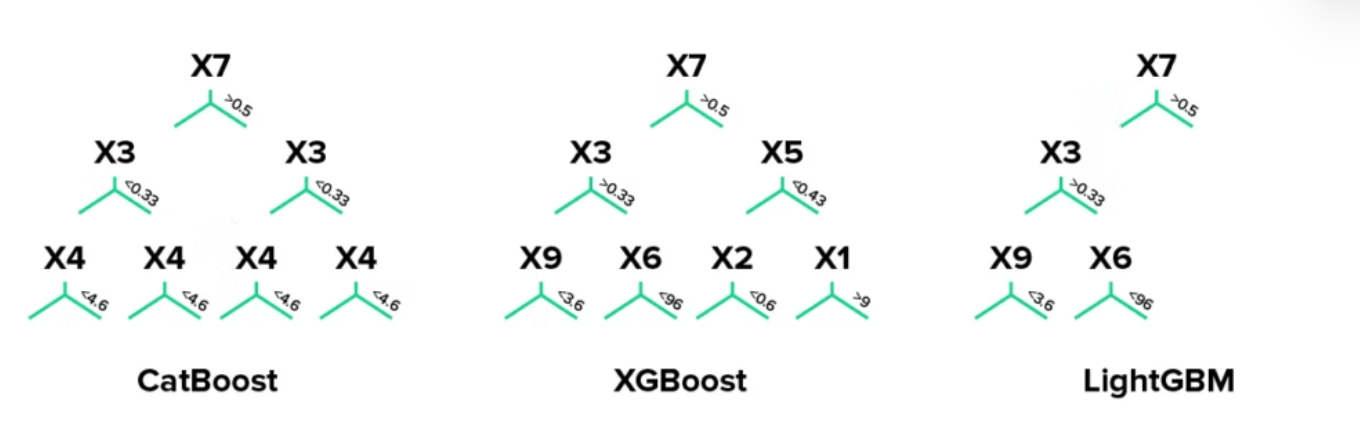

### Q7 ) Stacking  앙상블을 사용해보자 

In [21]:
# 라이브러리 가져오기
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm  import SVC

from sklearn.ensemble import  StackingClassifier 


seed = 0

#데이터로드
loaded_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(loaded_data.data, loaded_data.target, random_state=seed)
kfold = model_selection.KFold(n_splits = 5)
scores = {}

# 1. 로지스틱 회귀
lr_clf = LogisticRegression(solver='lbfgs', max_iter=10000)
lr_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(lr_clf, X_test, y_test, cv = kfold)
scores[('1.Logistic_regression', 'train_score')] = results.mean()
scores[('1.Logistic_regression', 'test_score')] = lr_clf.score(X_test, y_test)

# 2. 결정 나무
dtc_clf = DecisionTreeClassifier(random_state=seed)
dtc_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(dtc_clf, X_test, y_test, cv = kfold)
scores[('2.decision_tree', 'train_score')] = results.mean()
scores[('2.decision_tree', 'test_score')] = dtc_clf.score(X_test, y_test)

# 3.지원 벡터 머신(SVM)
svm_clf = SVC(probability=True, random_state=seed)
svm_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(svm_clf, X_test, y_test, cv = kfold)
scores[('3.SVM', 'train_score')] = results.mean()
scores[('3.SVM', 'test_score')] = svm_clf.score(X_test, y_test)

# 4. 스태킹 앙상블 StackingClassifier
estimators=[('lr', lr_clf), ('dtc', dtc_clf), ('svc', svm_clf)]
stk_clf=StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stk_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(stk_clf, X_test, y_test, cv = kfold)
scores[('4.Stacking', 'train_score')] = results.mean()
scores[('4.Stacking', 'test_score')] = stk_clf.score(X_test, y_test)

# 모델 평가
pd.Series(scores).unstack()

,test_score,train_score
1.Logistic_regression,0.951049,0.936946
2.decision_tree,0.881119,0.916010
3.SVM,0.937063,0.916749
4.Stacking,0.951049,0.958128
